In [1]:
import sys
import os
import glob
import corner
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st

In [2]:
def find_files(path):
    
    """
    function finds all folders in a directory matching a pattern, then reads data from a file in each 
    if the file is too short, this likely indicates a failure with multinest so it's ignored
    output is list of files with 'good' data
    """
    
    bad_files = []
    files = []

    for filepath in glob.iglob(os.path.join(path, "*imagecounts30")):

        try:

            with open(os.path.join( filepath, os.path.join("optimizer", "multinest.txt"))) as f:

                l = f.readlines()
        
                if len(l) < 100:

                    bad_files.append(filepath)

                files.append(filepath)

        except FileNotFoundError:
            files.append(filepath)
    
    good_files = list(set(files) - set(bad_files))
    
    return good_files
    

In [3]:
# path to where the data is
path = "/home/ppxjm4/Desktop/offset_phi_001/"

good_files = find_files(path)

In [5]:
def extract_data(files):

    """
    reads out all the relevant data from the 'good files'
    """
    
    einstein_radii = []
    lens_gal_centre_0 = []
    lens_gal_centre_1 = []
    lens_gal_phi = []
    lens_gal_axis_ratio = []

    for filepath in good_files:

        try:

            with open(os.path.join(filepath, "model.results")) as f:

                l = f.readlines()
                if len(l) >= 26:
        
                    lens_gal_centre_0.append(float(l[2].split()[-1]))
                    lens_gal_centre_1.append(float((l[3]).split()[-1]))
                    lens_gal_axis_ratio.append(float((l[5]).split()[-1]))
                    lens_gal_phi.append(float((l[6]).split()[-1]))
                    einstein_radii.append(float((l[4]).split()[-1]))
                
                else:
                    pass

        except FileNotFoundError:
            pass
        
    return einstein_radii, lens_gal_centre_0, lens_gal_centre_1, lens_gal_phi, lens_gal_axis_ratio

In [7]:
einstein_radii, lens_gal_centre_0, lens_gal_centre_1, lens_gal_phi, lens_gal_axis_ratio = extract_data(good_files)

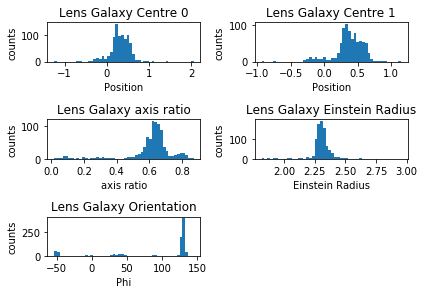

In [8]:
fig = plt.figure()

plt.subplot(3, 2, 1)
plt.tight_layout()
plt.hist(lens_gal_centre_0, bins=50)
plt.title("Lens Galaxy Centre 0")
plt.xlabel("Position")
plt.ylabel("counts")

plt.subplot(3, 2, 2)
plt.tight_layout()
plt.hist(lens_gal_centre_1, bins=50)
plt.title("Lens Galaxy Centre 1")
plt.xlabel("Position")
plt.ylabel("counts")

plt.subplot(3, 2, 3)
plt.tight_layout()
plt.hist(lens_gal_axis_ratio, bins=50)
plt.title("Lens Galaxy axis ratio")
plt.xlabel("axis ratio")
plt.ylabel("counts")

plt.subplot(3, 2, 4)
plt.tight_layout()
plt.hist(einstein_radii, bins=50)
plt.title("Lens Galaxy Einstein Radius")
plt.xlabel("Einstein Radius")
plt.ylabel("counts")

plt.subplot(3, 2, 5)
plt.tight_layout()
plt.hist(lens_gal_phi, bins=50)
plt.title("Lens Galaxy Orientation")
plt.xlabel("Phi")
plt.ylabel("counts")

plt.show()

In [9]:
data = np.zeros((len(einstein_radii), 5))

# map negative values back onto positive ones
# SIE lens model is symmetric under rotation by pi
lens_gal_phi = np.array(lens_gal_phi)
lens_gal_phi[lens_gal_phi<0] += 180

data[:,0] = lens_gal_centre_0
data[:,1] = lens_gal_centre_1
data[:,2] = einstein_radii
data[:,3] = lens_gal_axis_ratio
data[:,4] = lens_gal_phi

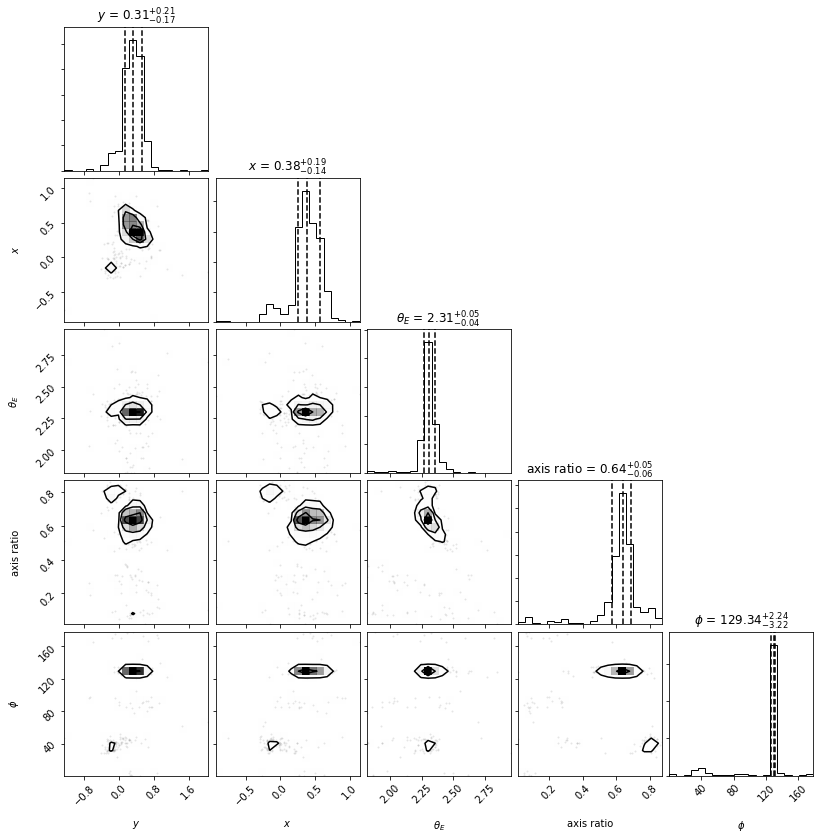

In [10]:
figure = corner.corner(data, quantiles=[0.16, 0.5, 0.84], labels=[r"$y$", r"$x$", r"$\theta_E$", "axis ratio", r"$\phi$"], show_titles=True)